Column: FirstObjectDistance_X
Mean: 41.028128650700936, Standard Deviation: 25.403712277159325, Median: 56.41796875
25th Percentile: 8.201171875, 75th Percentile: 64.001953125


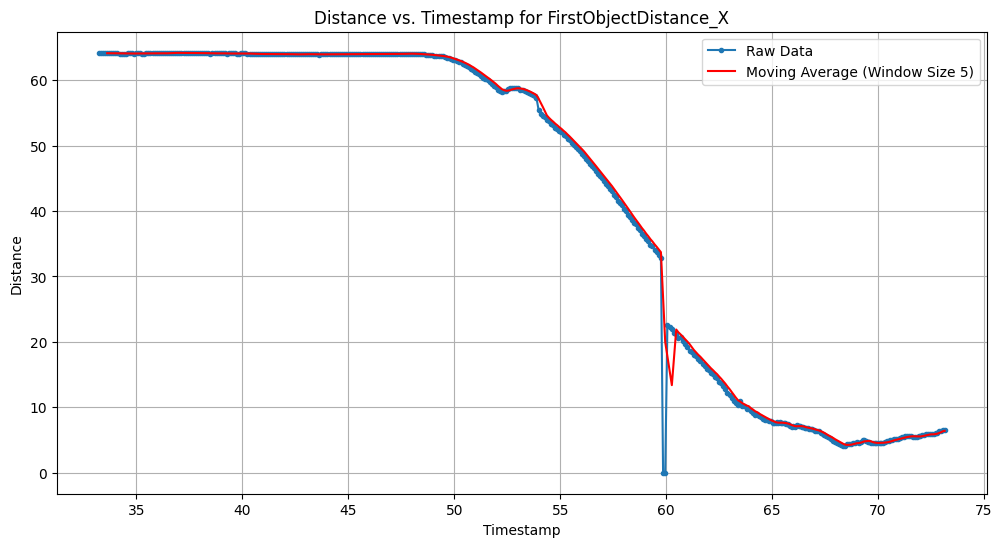

Column: FirstObjectDistance_Y
Mean: 8.932096962616823, Standard Deviation: 4.856997424617954, Median: 11.25
25th Percentile: 9.478515625, 75th Percentile: 11.291015625


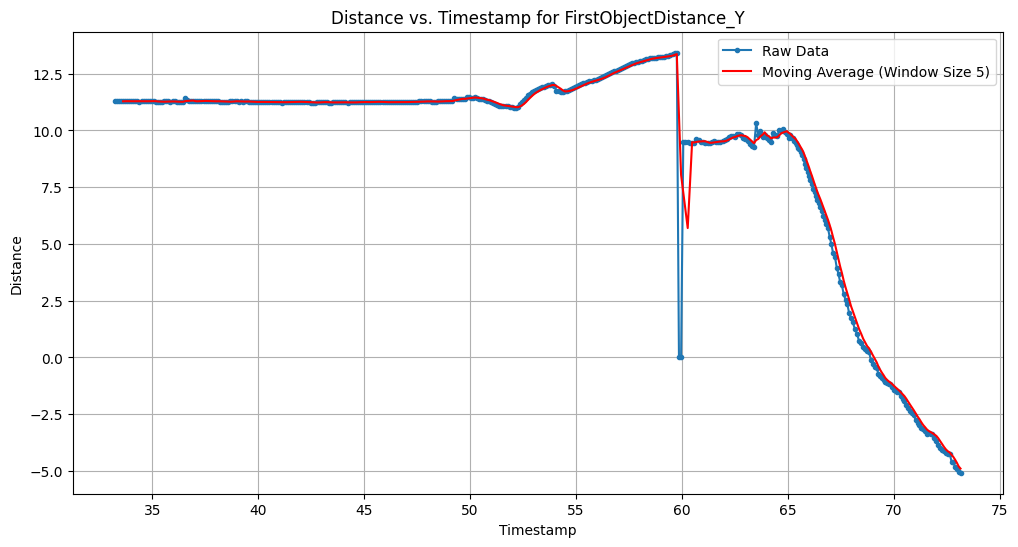

Column: SecondObjectDistance_X
Mean: 59.58595575350467, Standard Deviation: 27.707017285329623, Median: 66.50390625
25th Percentile: 42.609375, 75th Percentile: 79.671875


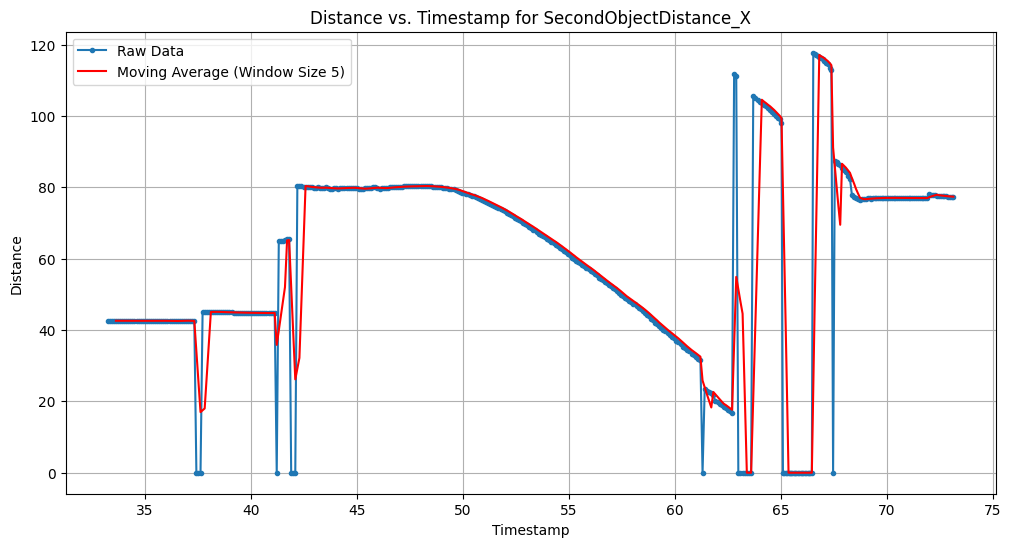

Column: SecondObjectDistance_Y
Mean: -10.64622882593458, Standard Deviation: 4.958127808738913, Median: -11.609375
25th Percentile: -13.0625, 75th Percentile: -9.794921875


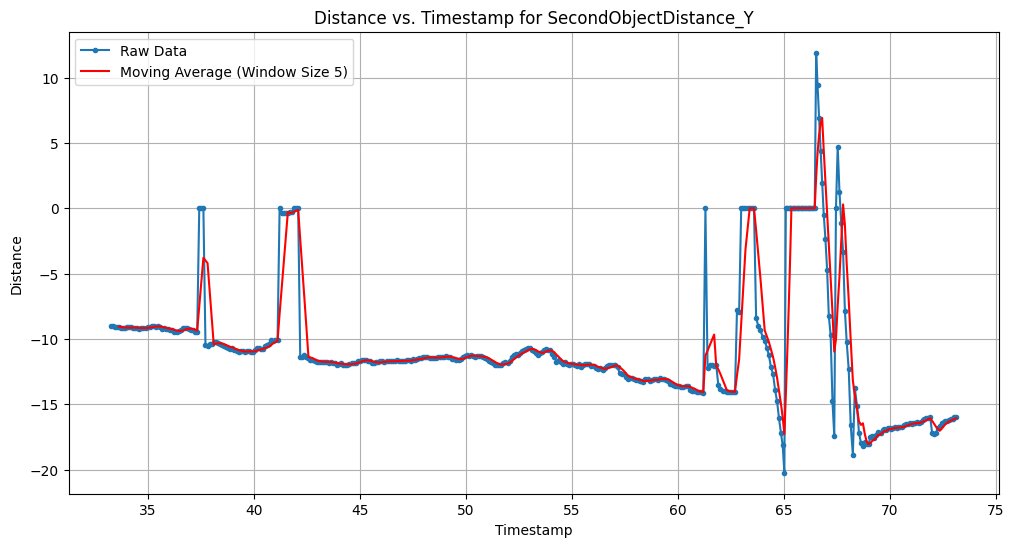

Column: ThirdObjectDistance_X
Mean: 28.408495181074766, Standard Deviation: 29.769706680567566, Median: 24.07421875
25th Percentile: 0.0, 75th Percentile: 45.42578125


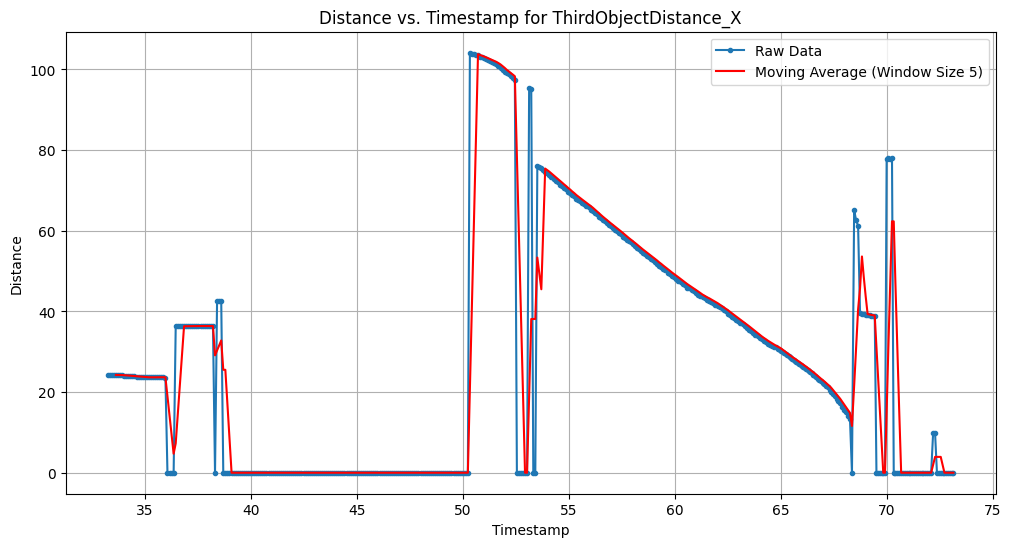

Column: ThirdObjectDistance_Y
Mean: 0.8771539135514018, Standard Deviation: 7.718512047519297, Median: 0.0
25th Percentile: -3.07421875, 75th Percentile: 11.03125


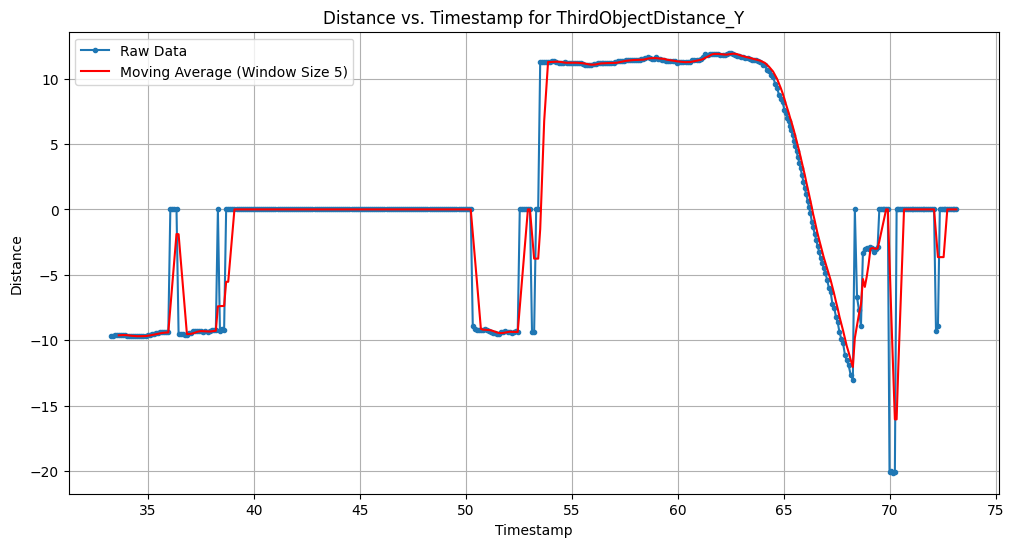

Column: FourthObjectDistance_X
Mean: 19.913989485981308, Standard Deviation: 21.949848983900075, Median: 9.93359375
25th Percentile: 0.0, 75th Percentile: 42.13671875


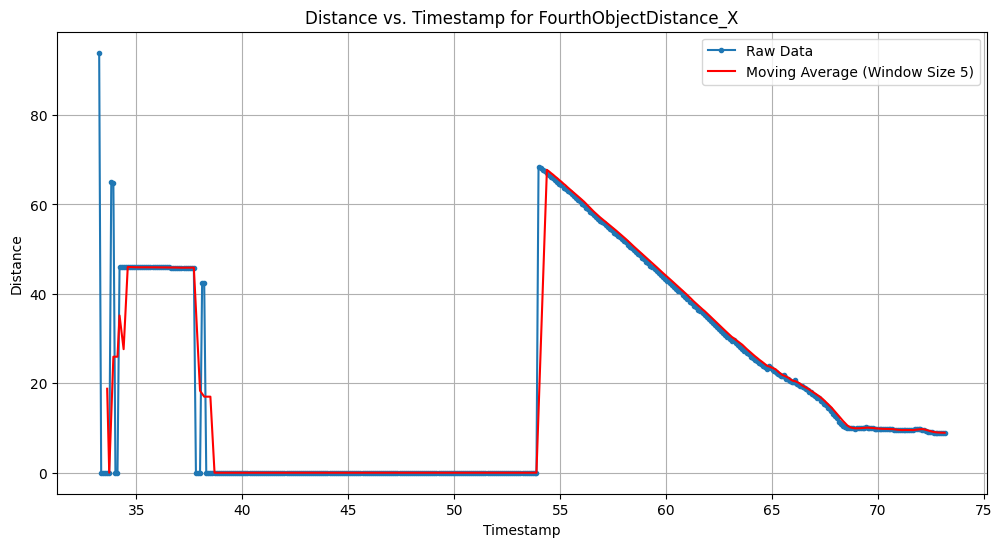

Column: FourthObjectDistance_Y
Mean: 1.9825313960280373, Standard Deviation: 7.910440459482504, Median: 0.0
25th Percentile: -0.3671875, 75th Percentile: 11.767578125


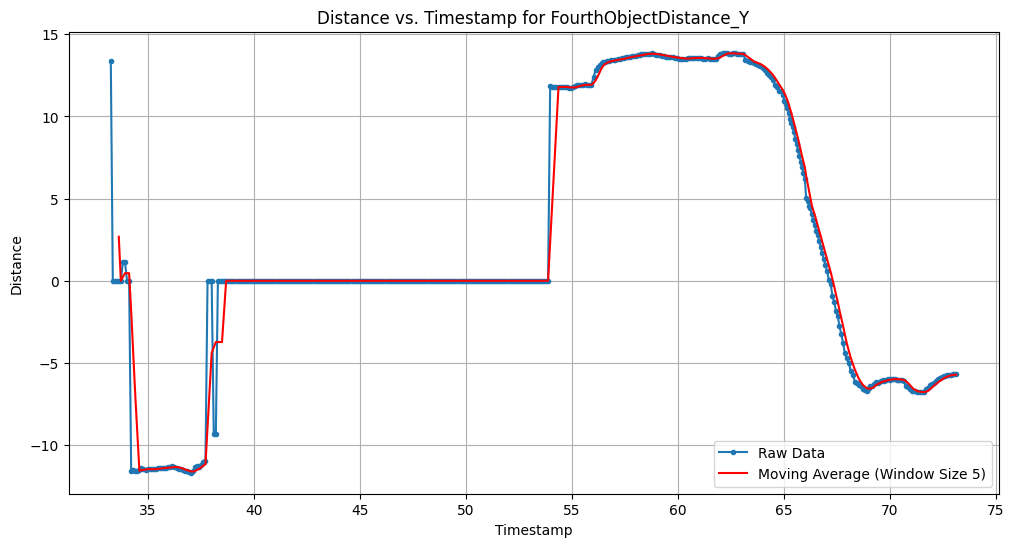

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'data_normalized.csv' with your file path)
data = pd.read_csv('data_normalized.csv')

# Define the columns to analyze
columns_to_analyze = [
    'FirstObjectDistance_X', 'FirstObjectDistance_Y',
    'SecondObjectDistance_X', 'SecondObjectDistance_Y',
    'ThirdObjectDistance_X', 'ThirdObjectDistance_Y',
    'FourthObjectDistance_X', 'FourthObjectDistance_Y'
]

# Define parameters for moving average
window_size = 5

# Plot and analyze each column
for column_name in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    
    # Plot the raw data
    plt.plot(data['Timestamp'], data[column_name], label='Raw Data', marker='o', markersize=3)
    
    # Calculate and plot the moving average
    moving_avg = data[column_name].rolling(window=window_size).mean()
    plt.plot(data['Timestamp'], moving_avg, label=f'Moving Average (Window Size {window_size})', color='red')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Distance')
    plt.title(f'Distance vs. Timestamp for {column_name}')
    plt.legend()
    plt.grid(True)
    
    # Calculate descriptive statistics
    mean = data[column_name].mean()
    std_dev = data[column_name].std()
    median = data[column_name].median()
    quartiles = data[column_name].quantile([0.25, 0.75])
    
    print(f"Column: {column_name}")
    print(f"Mean: {mean}, Standard Deviation: {std_dev}, Median: {median}")
    print(f"25th Percentile: {quartiles[0.25]}, 75th Percentile: {quartiles[0.75]}")
    
    plt.show()


In [10]:
import pandas as pd
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt


In [21]:
data = pd.read_csv('data_normalized.csv')
data

,Unnamed: 0.1,Unnamed: 0,FirstObjectDistance_X,FirstObjectDistance_Y,SecondObjectDistance_X,SecondObjectDistance_Y,ThirdObjectDistance_X,ThirdObjectDistance_Y,FourthObjectDistance_X,FourthObjectDistance_Y,...,FirstObjectSpeed_X,FirstObjectSpeed_Y,SecondObjectSpeed_X,SecondObjectSpeed_Y,ThirdObjectSpeed_X,ThirdObjectSpeed_Y,FourthObjectSpeed_X,FourthObjectSpeed_Y,YawRate,Timestamp
0,0,0,64.148438,11.281250,42.617188,-9.007812,24.242188,-9.664062,93.937500,13.398438,...,-0.007812,0.000000,0.015625,0.003906,0.003906,0.027344,0.027344,0.000000,0.000000,33.241504
1,1,1,64.125000,11.273438,42.617188,-9.007812,24.234375,-9.664062,0.000000,0.000000,...,-0.015625,0.000000,-0.007812,0.011719,0.000000,0.023438,0.000000,0.000000,0.000000,33.335960
2,2,2,64.148438,11.281250,42.601562,-9.062500,24.250000,-9.625000,0.000000,0.000000,...,-0.011719,0.000000,-0.003906,-0.035156,0.019531,0.031250,0.000000,0.000000,0.000000,33.429725
3,3,3,64.132812,11.289062,42.593750,-9.109375,24.250000,-9.625000,0.000000,0.000000,...,-0.015625,0.000000,0.000000,-0.054688,0.011719,0.046875,0.000000,0.000000,0.000000,33.522769
4,4,4,64.132812,11.289062,42.593750,-9.117188,24.265625,-9.570312,0.000000,0.000000,...,0.000000,0.003906,0.000000,-0.042969,0.031250,0.062500,0.000000,0.000000,0.000000,33.618715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,423,423,6.109375,-4.601562,77.437500,-16.179688,0.000000,0.000000,8.945312,-5.726562,...,1.093750,-0.687500,0.039062,0.132812,0.000000,0.000000,0.003906,-0.039062,-0.001343,72.804477
424,424,424,6.445312,-4.835938,77.429688,-16.132812,0.000000,0.000000,8.937500,-5.726562,...,2.718750,-0.597656,0.011719,0.148438,0.000000,0.000000,0.027344,-0.019531,-0.001343,72.889443
425,425,425,6.406250,-4.929688,77.390625,-16.093750,0.000000,0.000000,8.953125,-5.703125,...,2.632812,-0.597656,0.039062,0.121094,0.000000,0.000000,0.070312,-0.019531,-0.001343,72.972854
426,426,426,6.562500,-5.031250,77.359375,-15.992188,0.000000,0.000000,8.945312,-5.703125,...,2.625000,-0.503906,0.042969,0.136719,0.000000,0.000000,0.074219,-0.011719,-0.001343,73.057103


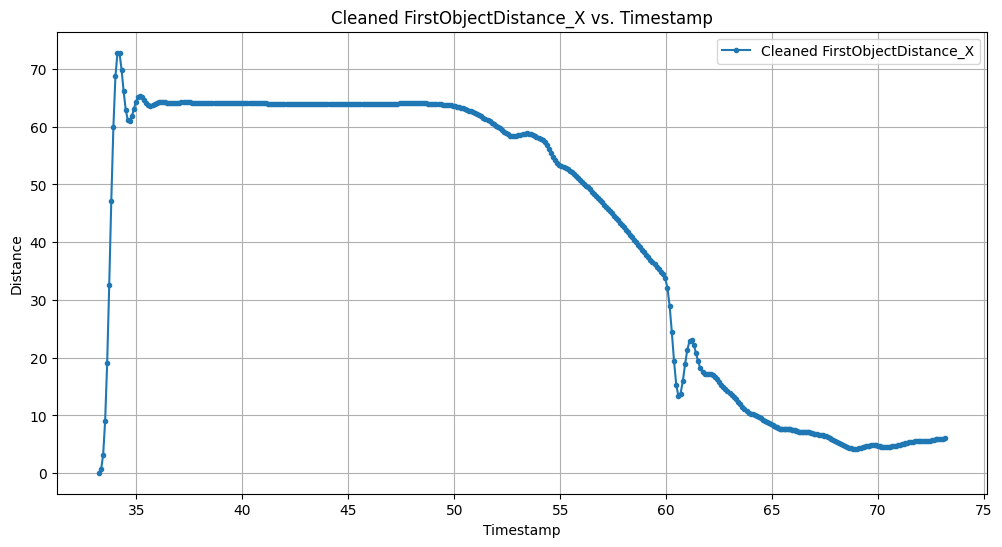

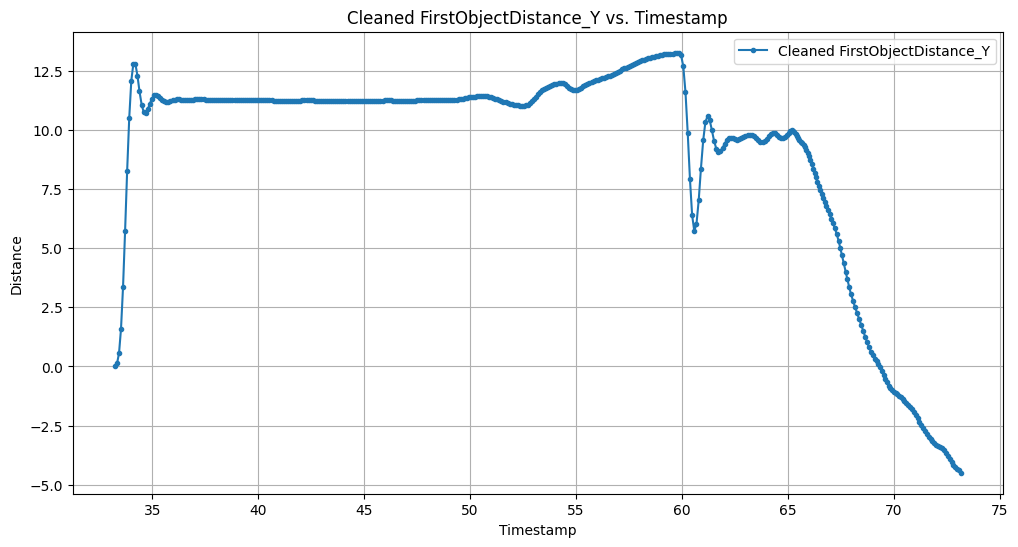

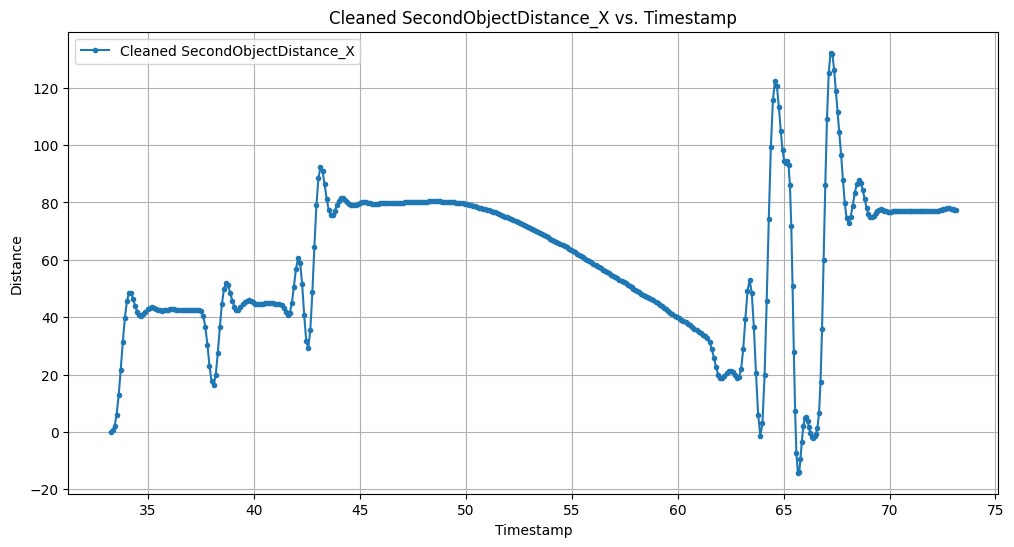

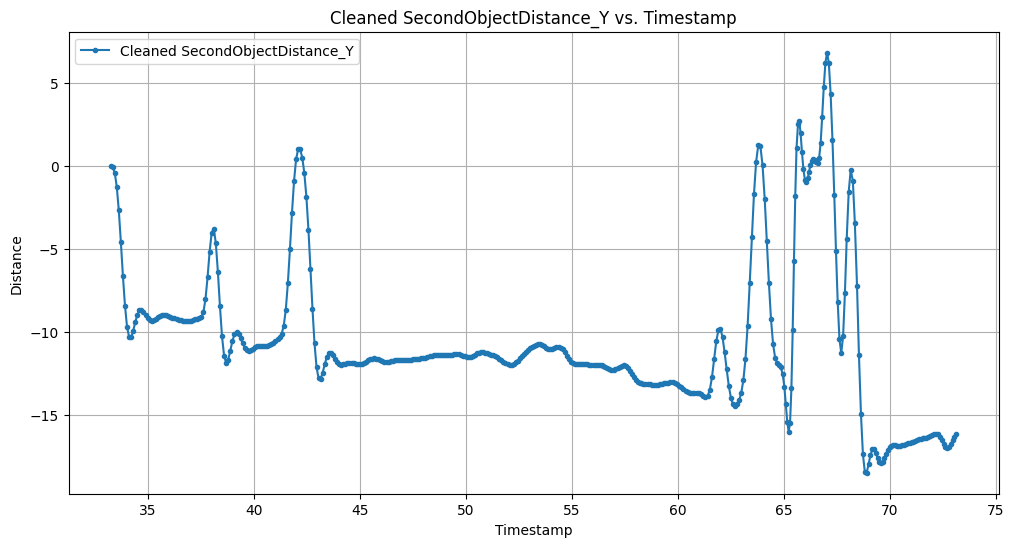

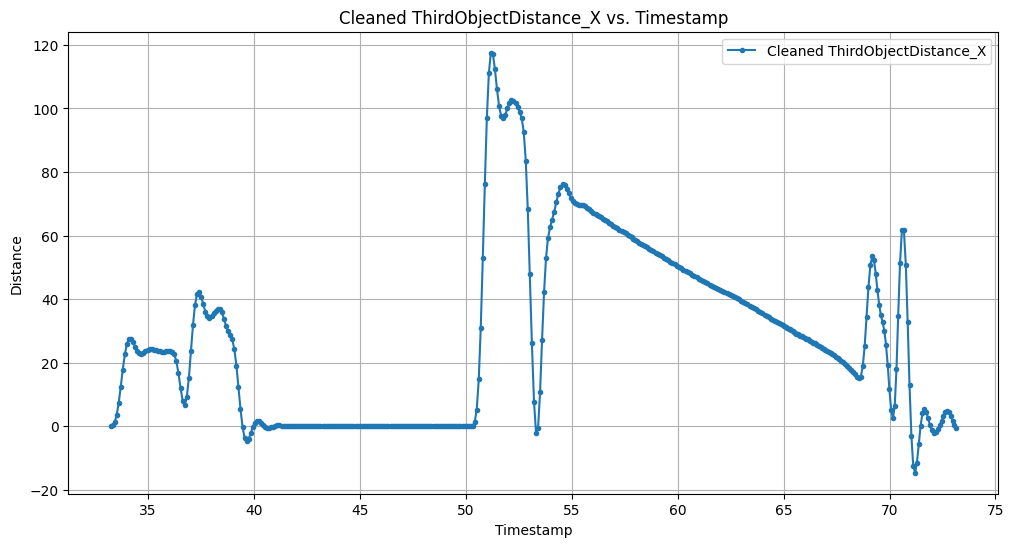

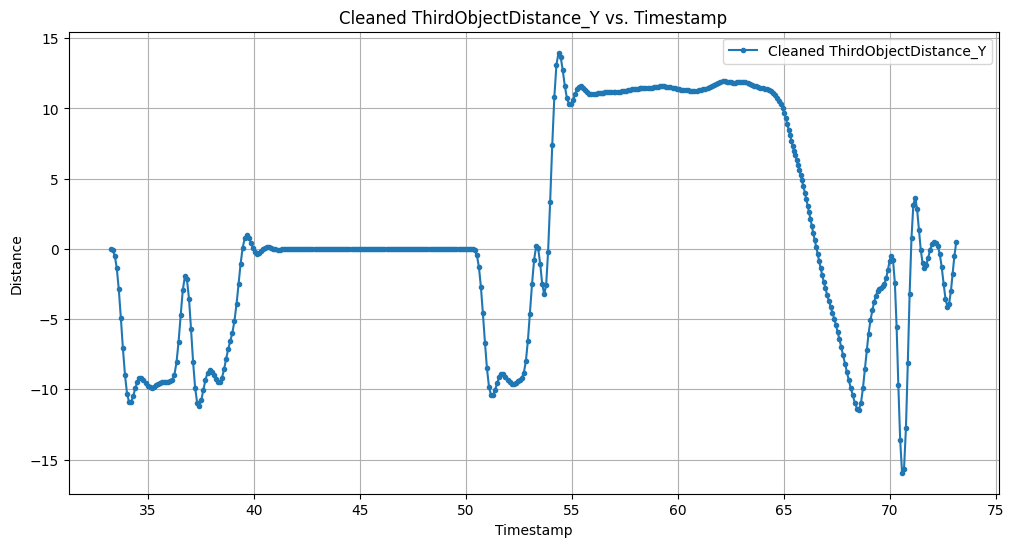

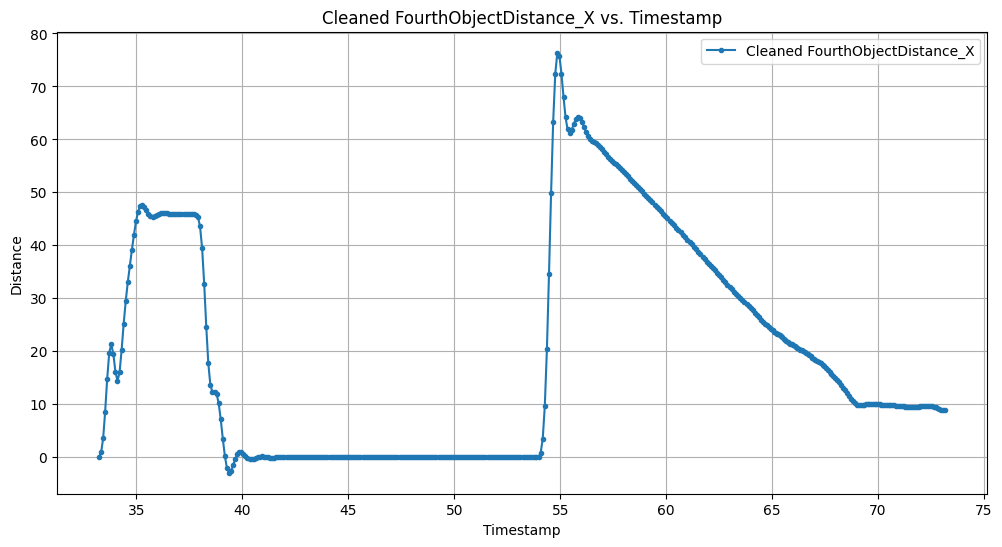

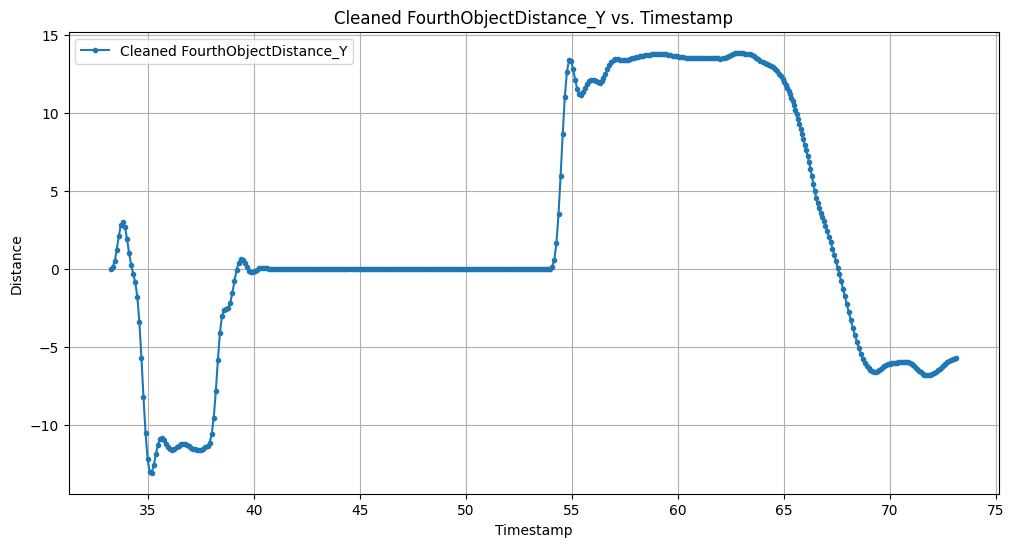

In [19]:
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'data_normalized.csv' with your file path)
data = pd.read_csv('data_normalized.csv')

# Columns to analyze
columns_to_filter = ['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y',
                     'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']

# Filter parameters
filter_order = 5
filter_cutoff = 0.1

# Create separate plots for each column
for column_name in columns_to_filter:
    # Extract the data column to be filtered
    data_column = data[column_name].values

    # Design the Butterworth low-pass filter
    b, a = signal.butter(filter_order, filter_cutoff, fs=1.0, btype='low', analog=False)

    # Apply the filter to the data
    filtered_data = signal.lfilter(b, a, data_column)

    # Replace the original column with the filtered data
    data[column_name] = filtered_data

    # Create and display the plot
    plt.figure(figsize=(12, 6))
    plt.plot(data['Timestamp'], filtered_data, label=f'Cleaned {column_name}', marker='o', markersize=3)
    plt.xlabel('Timestamp')
    plt.ylabel('Distance')
    plt.title(f'Cleaned {column_name} vs. Timestamp')
    plt.legend()
    plt.grid(True)
    plt.show()



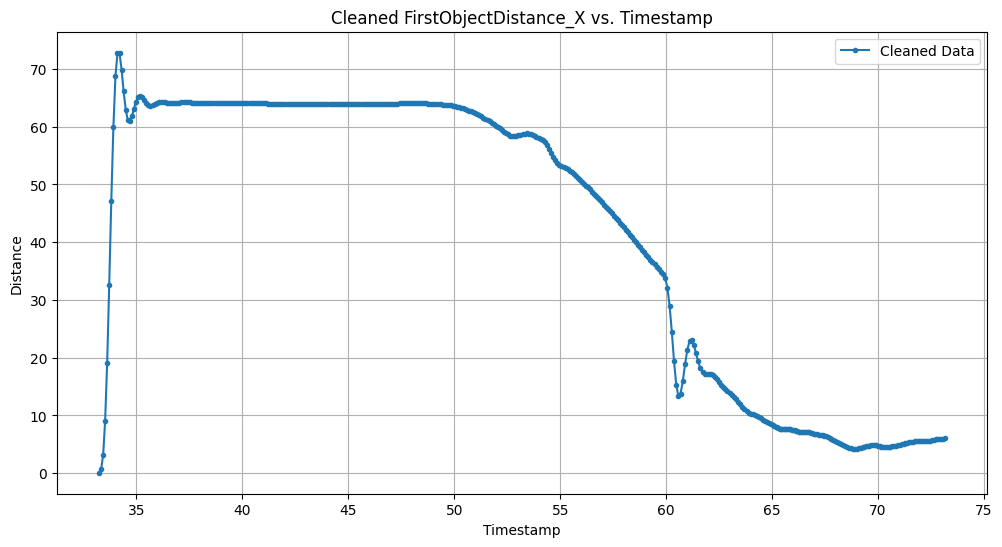

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data[column_name], label='Cleaned Data', marker='o', markersize=3)
plt.xlabel('Timestamp')
plt.ylabel('Distance')
plt.title(f'Cleaned {column_name} vs. Timestamp')
plt.legend()
plt.grid(True)
plt.show()

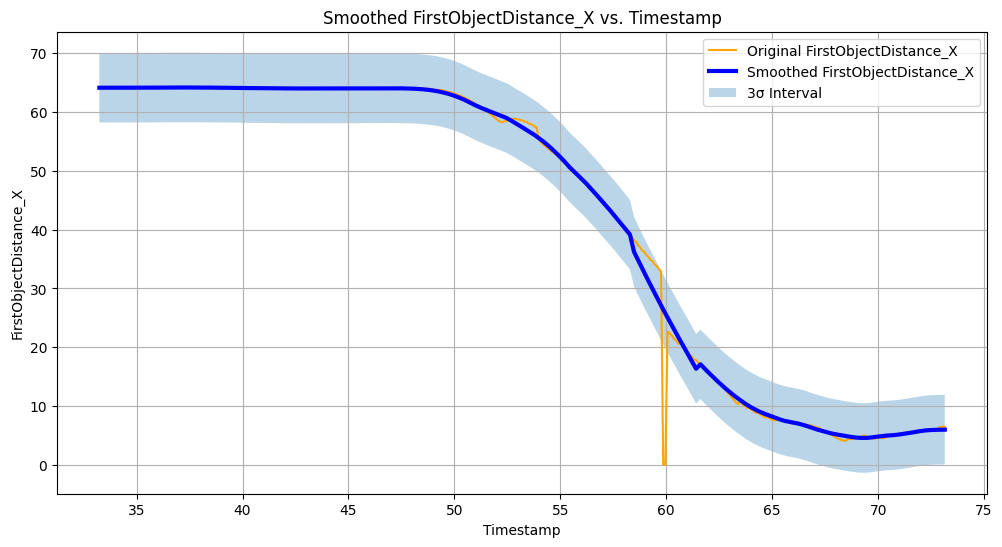

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

# Load your dataset (replace 'data_normalized.csv' with your file path)
data = pd.read_csv('data_normalized.csv')

# Specify the column to analyze
column_name = 'FirstObjectDistance_X'  # Replace with your desired column name

# Extract the data column to be smoothed
data_column = data[column_name].values

# Operate smoothing
smoother = ConvolutionSmoother(window_len=30, window_type='ones')
smoother.smooth(data_column)

# Generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=3)

# Plot the smoothed timeseries with intervals
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data_column, color='orange', label=f'Original {column_name}')
plt.plot(data['Timestamp'], smoother.smooth_data[0], linewidth=3, color='blue', label=f'Smoothed {column_name}')
plt.fill_between(data['Timestamp'], low[0], up[0], alpha=0.3, label='3σ Interval')
plt.xlabel('Timestamp')
plt.ylabel(column_name)
plt.title(f'Smoothed {column_name} vs. Timestamp')
plt.legend()
plt.grid(True)
plt.show()


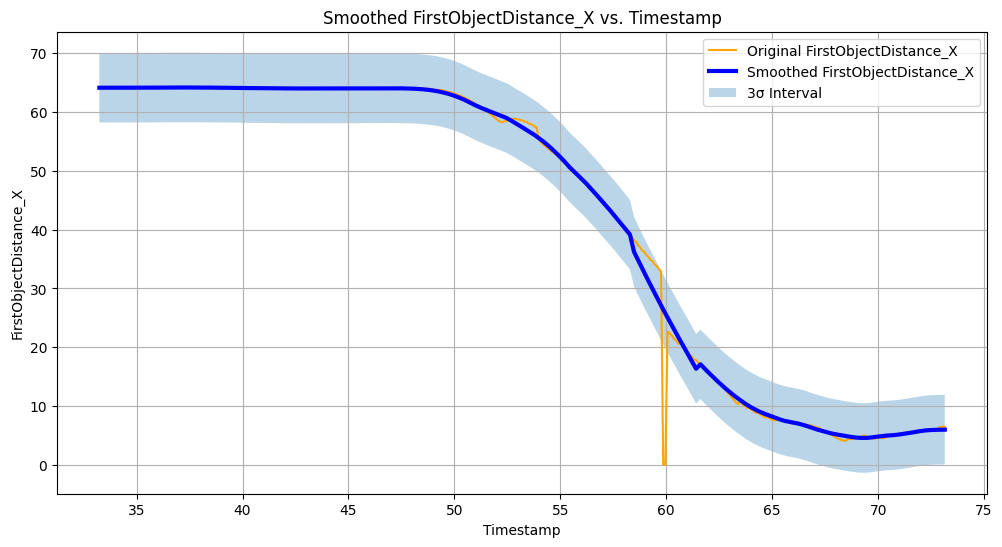

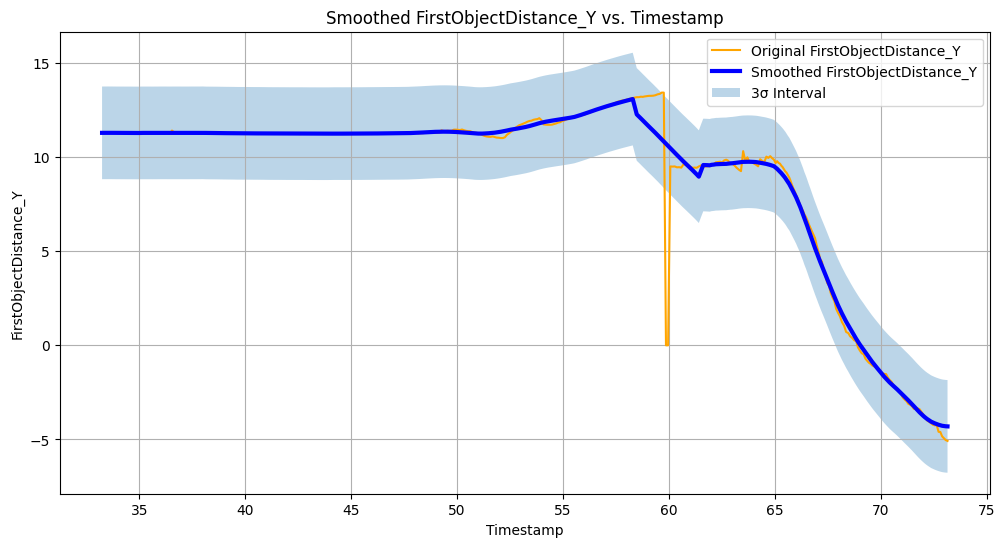

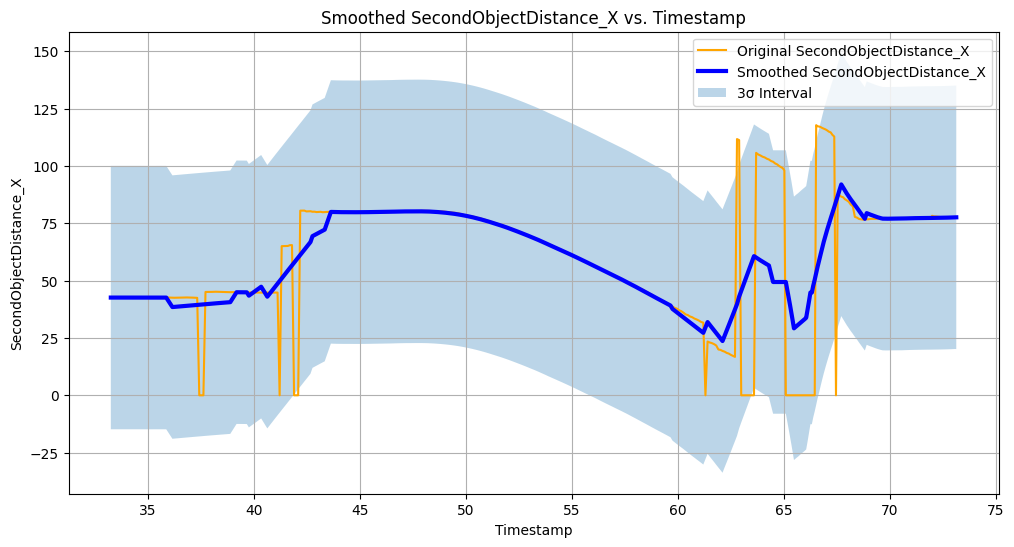

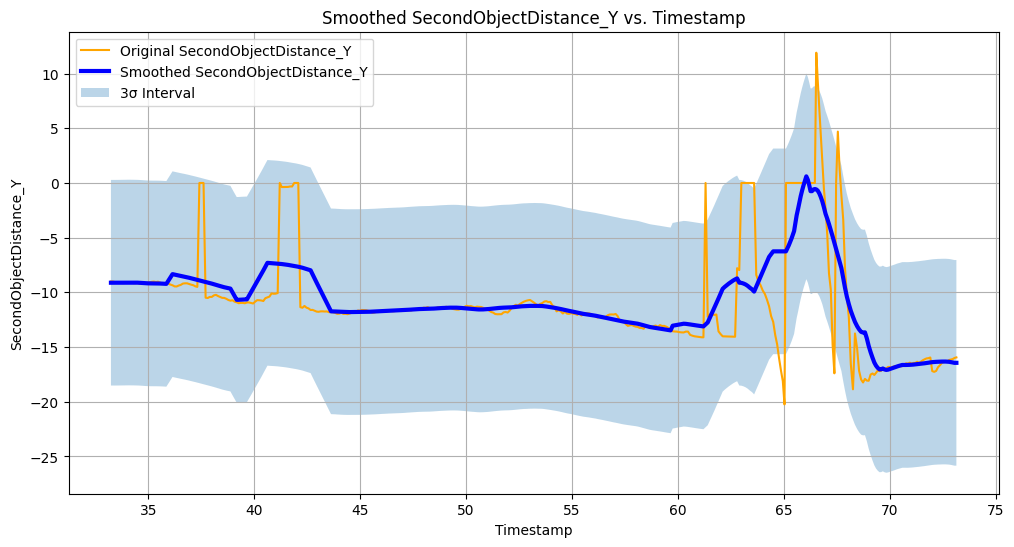

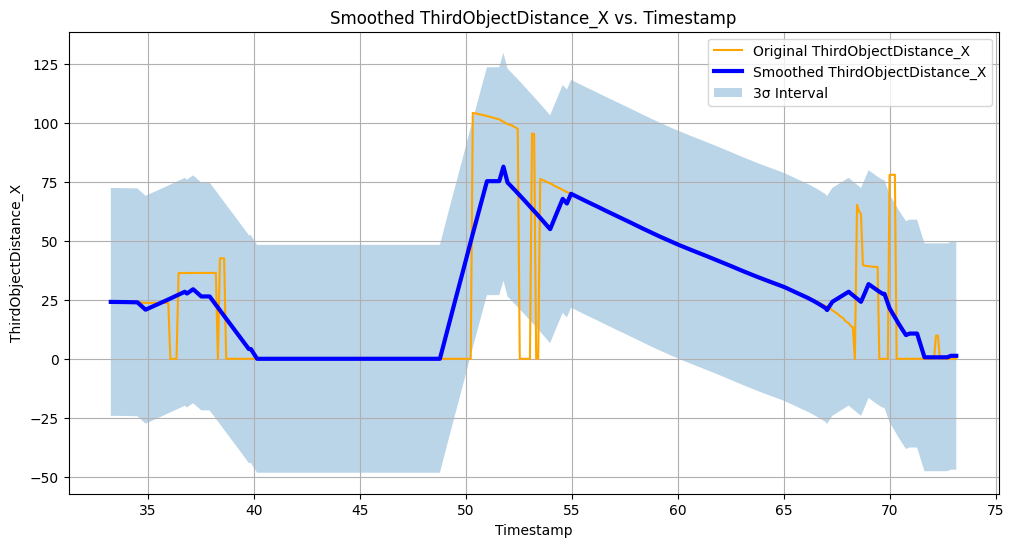

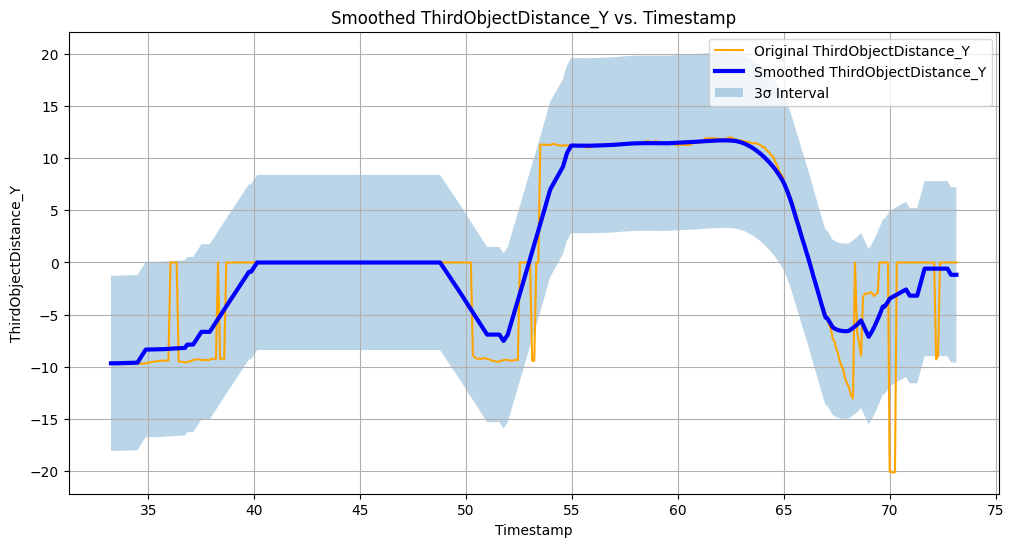

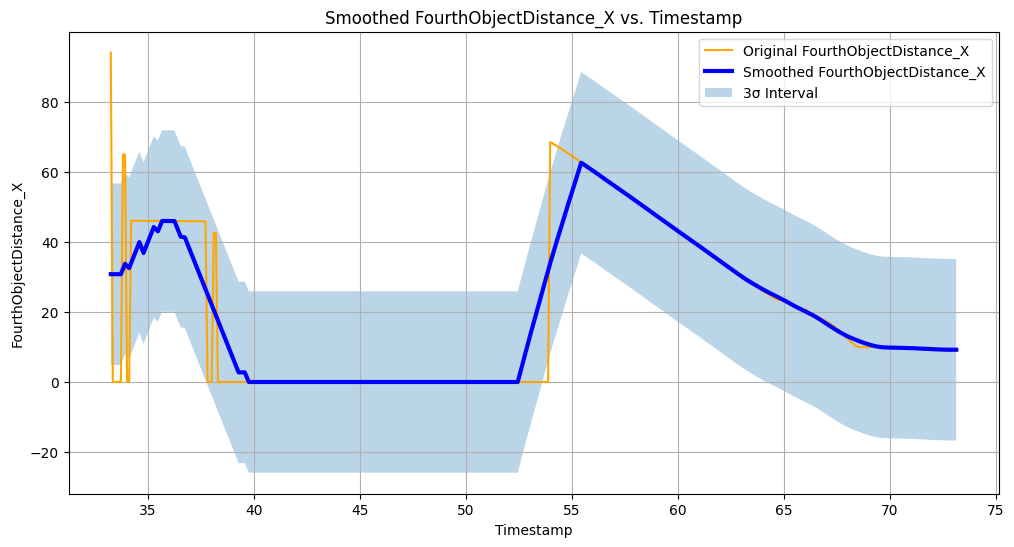

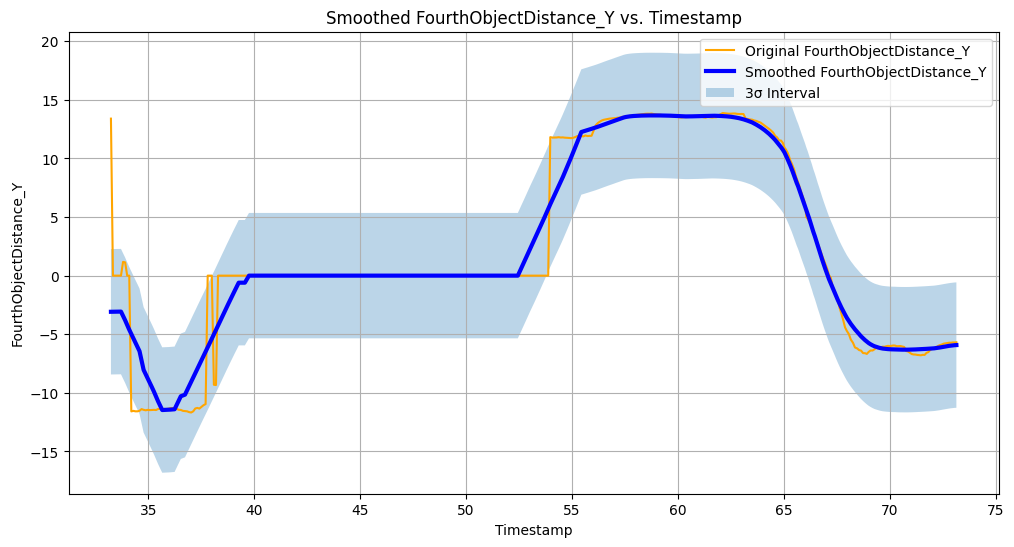

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from tsmoothie.smoother import ConvolutionSmoother

# Load your dataset (replace 'data_normalized.csv' with your file path)
data = pd.read_csv('data_normalized.csv')

# Columns to be smoothed
columns_to_smooth = [
    'FirstObjectDistance_X',
    'FirstObjectDistance_Y',
    'SecondObjectDistance_X',
    'SecondObjectDistance_Y',
    'ThirdObjectDistance_X',
    'ThirdObjectDistance_Y',
    'FourthObjectDistance_X',
    'FourthObjectDistance_Y'
]

# Define the smoothing parameters
window_len = 30
window_type = 'ones'

# Create separate plots for each column
for column_name in columns_to_smooth:
    plt.figure(figsize=(12, 6))

    # Extract the data column to be smoothed
    data_column = data[column_name].values

    # Operate smoothing
    smoother = ConvolutionSmoother(window_len=window_len, window_type=window_type)
    smoother.smooth(data_column)

    # Generate intervals
    low, up = smoother.get_intervals('sigma_interval', n_sigma=3)

    # Plot the smoothed timeseries with intervals
    plt.plot(data['Timestamp'], data_column, color='orange', label=f'Original {column_name}')
    plt.plot(data['Timestamp'], smoother.smooth_data[0], linewidth=3, color='blue', label=f'Smoothed {column_name}')
    plt.fill_between(data['Timestamp'], low[0], up[0], alpha=0.3, label='3σ Interval')
    plt.xlabel('Timestamp')
    plt.ylabel(column_name)
    plt.title(f'Smoothed {column_name} vs. Timestamp')
    plt.legend()
    plt.grid(True)
    plt.show()

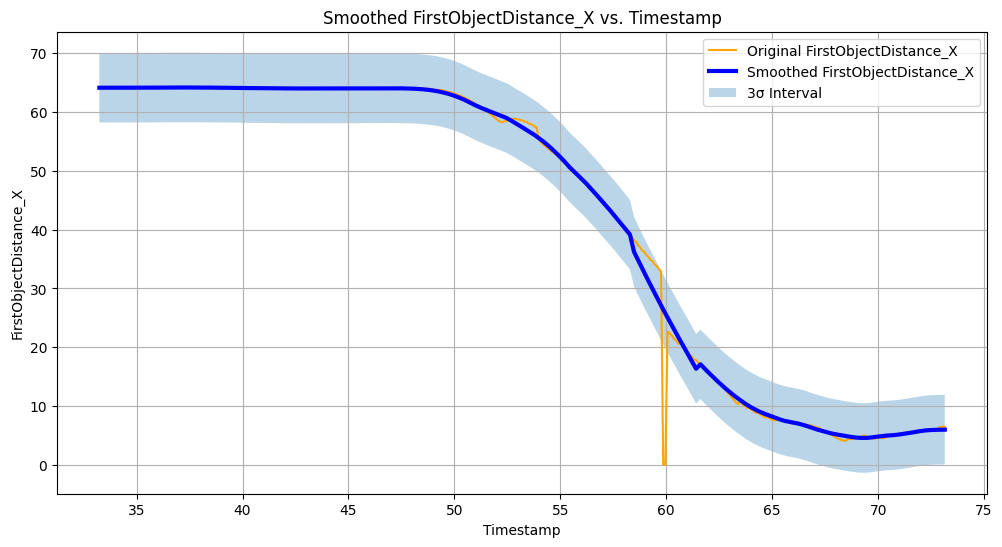

Skipping 'FirstObjectDistance_Y' due to zero or negative values.


<Figure size 1200x600 with 0 Axes>

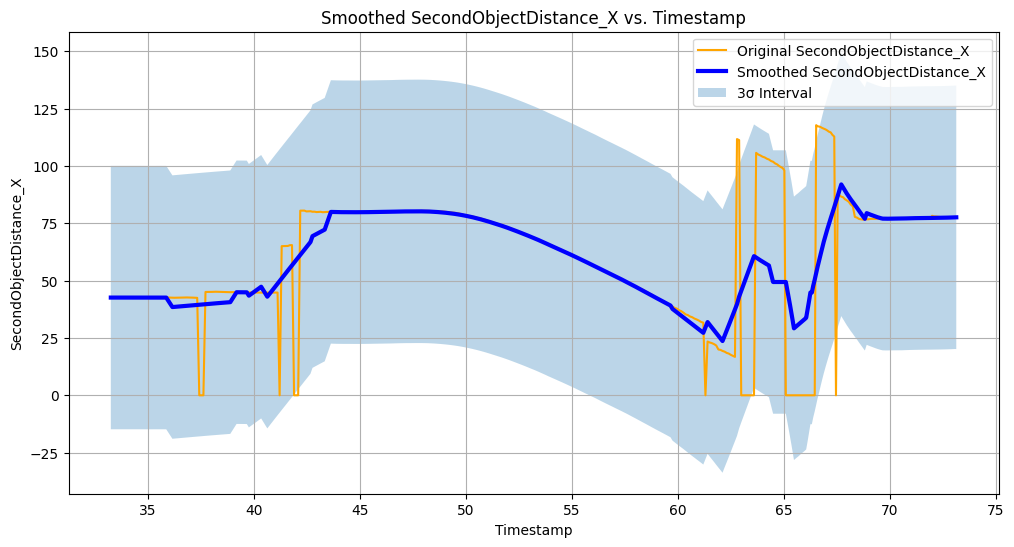

Skipping 'SecondObjectDistance_Y' due to zero or negative values.


<Figure size 1200x600 with 0 Axes>

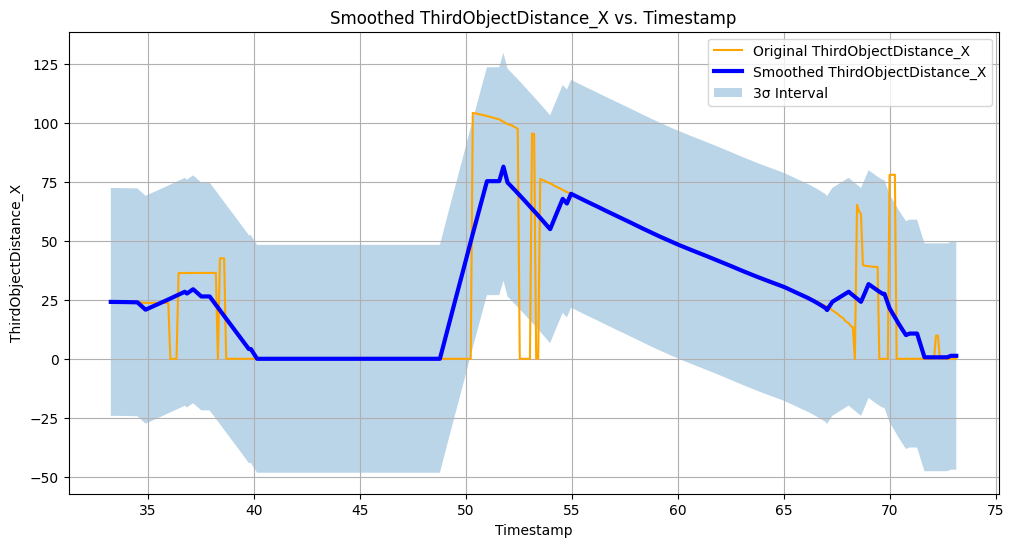

Skipping 'ThirdObjectDistance_Y' due to zero or negative values.


<Figure size 1200x600 with 0 Axes>

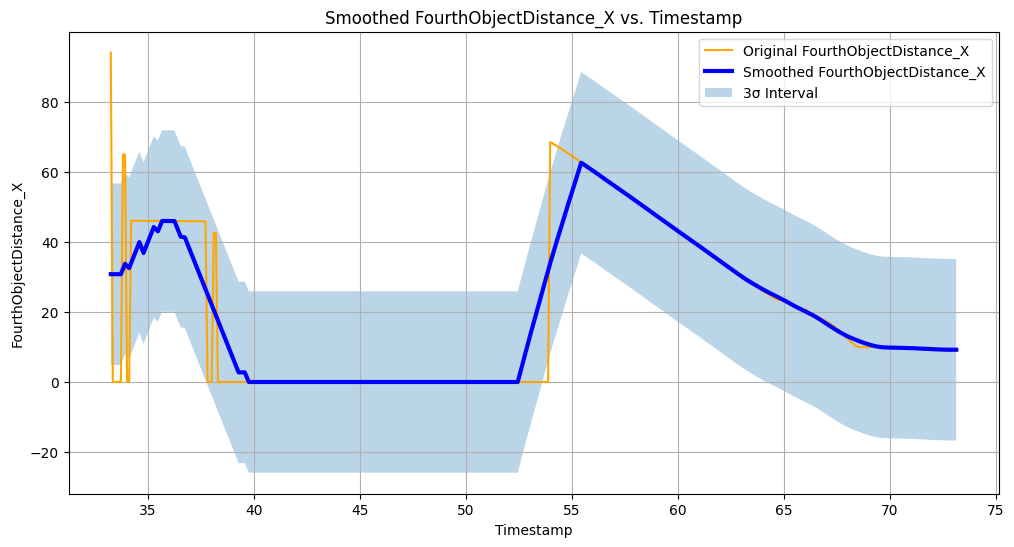

Skipping 'FourthObjectDistance_Y' due to zero or negative values.


<Figure size 1200x600 with 0 Axes>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import ConvolutionSmoother

# Load your dataset (replace 'data_normalized.csv' with your file path)
data = pd.read_csv('data_normalized.csv')

# Columns to be smoothed
columns_to_smooth = [
    'FirstObjectDistance_X',
    'FirstObjectDistance_Y',
    'SecondObjectDistance_X',
    'SecondObjectDistance_Y',
    'ThirdObjectDistance_X',
    'ThirdObjectDistance_Y',
    'FourthObjectDistance_X',
    'FourthObjectDistance_Y'
]

# Define the smoothing parameters
window_len = 30
window_type = 'ones'

# Create a new DataFrame to store the smoothed data
smoothed_data = data.copy()

# Create separate plots for each column
for column_name in columns_to_smooth:
    plt.figure(figsize=(12, 6))

    # Extract the data column to be smoothed
    data_column = data[column_name].values

    # Check for zero or negative values in the data
    if (data_column < 0).any():
        print(f"Skipping '{column_name}' due to zero or negative values.")
        continue

    # Operate smoothing
    smoother = ConvolutionSmoother(window_len=window_len, window_type=window_type)
    smoother.smooth(data_column)

    # Generate intervals
    low, up = smoother.get_intervals('sigma_interval', n_sigma=3)

    # Plot the smoothed timeseries with intervals
    plt.plot(data['Timestamp'], data_column, color='orange', label=f'Original {column_name}')
    plt.plot(data['Timestamp'], smoother.smooth_data[0], linewidth=3, color='blue', label=f'Smoothed {column_name}')
    plt.fill_between(data['Timestamp'], low[0], up[0], alpha=0.3, label='3σ Interval')
    plt.xlabel('Timestamp')
    plt.ylabel(column_name)
    plt.title(f'Smoothed {column_name} vs. Timestamp')
    plt.legend()
    plt.grid(True)

    # Update the smoothed data in the new DataFrame
    smoothed_data[column_name] = smoother.smooth_data[0]

    # Save the image with a unique name
    plt.show()

# Save the smoothed data to a new CSV file
smoothed_data.to_csv('smoothed_data.csv', index=False)
